# AI Project: Neural Network



---

In [1]:
# Libraries
import matplotlib
import numpy as np
import pandas as pd
from itertools import product
from ucimlrepo import fetch_ucirepo
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modules
from ai_nn_project.utils.activations import Sigmoid, ReLU, Linear
from ai_nn_project.utils.visualisation import visualize_weights
from ai_nn_project.utils.evaluations import accuracy, precision, recall, f1_score, mse_loss, mae_loss, rmse_loss, mape_loss, r2_score
from ai_nn_project.models.neuronal_network.multilayer_perceptron import MLP
from ai_nn_project.models.neigbours.knn import KNN


# make figures appear inline
matplotlib.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

---

## Introduction

## Data

### Mushroom Dataset: Classification

In [2]:
# fetch dataset

# Mushroom. (1987). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.
mushroom = fetch_ucirepo(id=73) 

# Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.
wine_quality = fetch_ucirepo(id=186)

In [3]:
mushroom_X = mushroom.data.features
mushroom_y = mushroom.data.targets

In [4]:
mushroom_X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushroom_y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [6]:
# Encode categorical features as a one-hot numeric array: Gives a unique number to each category
le = LabelEncoder()

mushroom_X_encoded = mushroom_X.apply(le.fit_transform).to_numpy()
mushroom_y_encoded = mushroom_y.apply(le.fit_transform).to_numpy()

mushroom_X_train, mushroom_X_test, mushroom_y_train, mushroom_y_test = train_test_split(mushroom_X_encoded, mushroom_y_encoded, test_size=0.2, random_state=42)

### Wine Dataset: Regression

In [7]:
wine_X = wine_quality.data.features
wine_y = wine_quality.data.targets

In [8]:
wine_X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
wine_y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [10]:
scaler = StandardScaler()
wine_X_scaled = scaler.fit_transform(wine_X)
wine_y_scaled = wine_y.to_numpy()

wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X_scaled, wine_y_scaled, test_size=0.2, random_state=42)

## Baseline K-Nearest Neighbors: Classification

In [29]:
knn = KNN(k=20)
knn.fit(mushroom_X_train, mushroom_y_train)
mushroom_output = knn.predict(mushroom_X_test)

In [39]:
mushroom_output = mushroom_output.reshape(-1, 1)

print("Accuracy: ", accuracy(mushroom_y_test, mushroom_output))
print("Precision: ", precision(mushroom_y_test, mushroom_output))
print("Recall: ", recall(mushroom_y_test, mushroom_output))
print("F1-Score: ", f1_score(mushroom_y_test, mushroom_output))

Accuracy:  0.9950769230769231
Precision:  0.9961538461538462
Recall:  0.9936061381074168
F1-Score:  0.9948783610755442


## Multi-Layer Perceptron: Classification

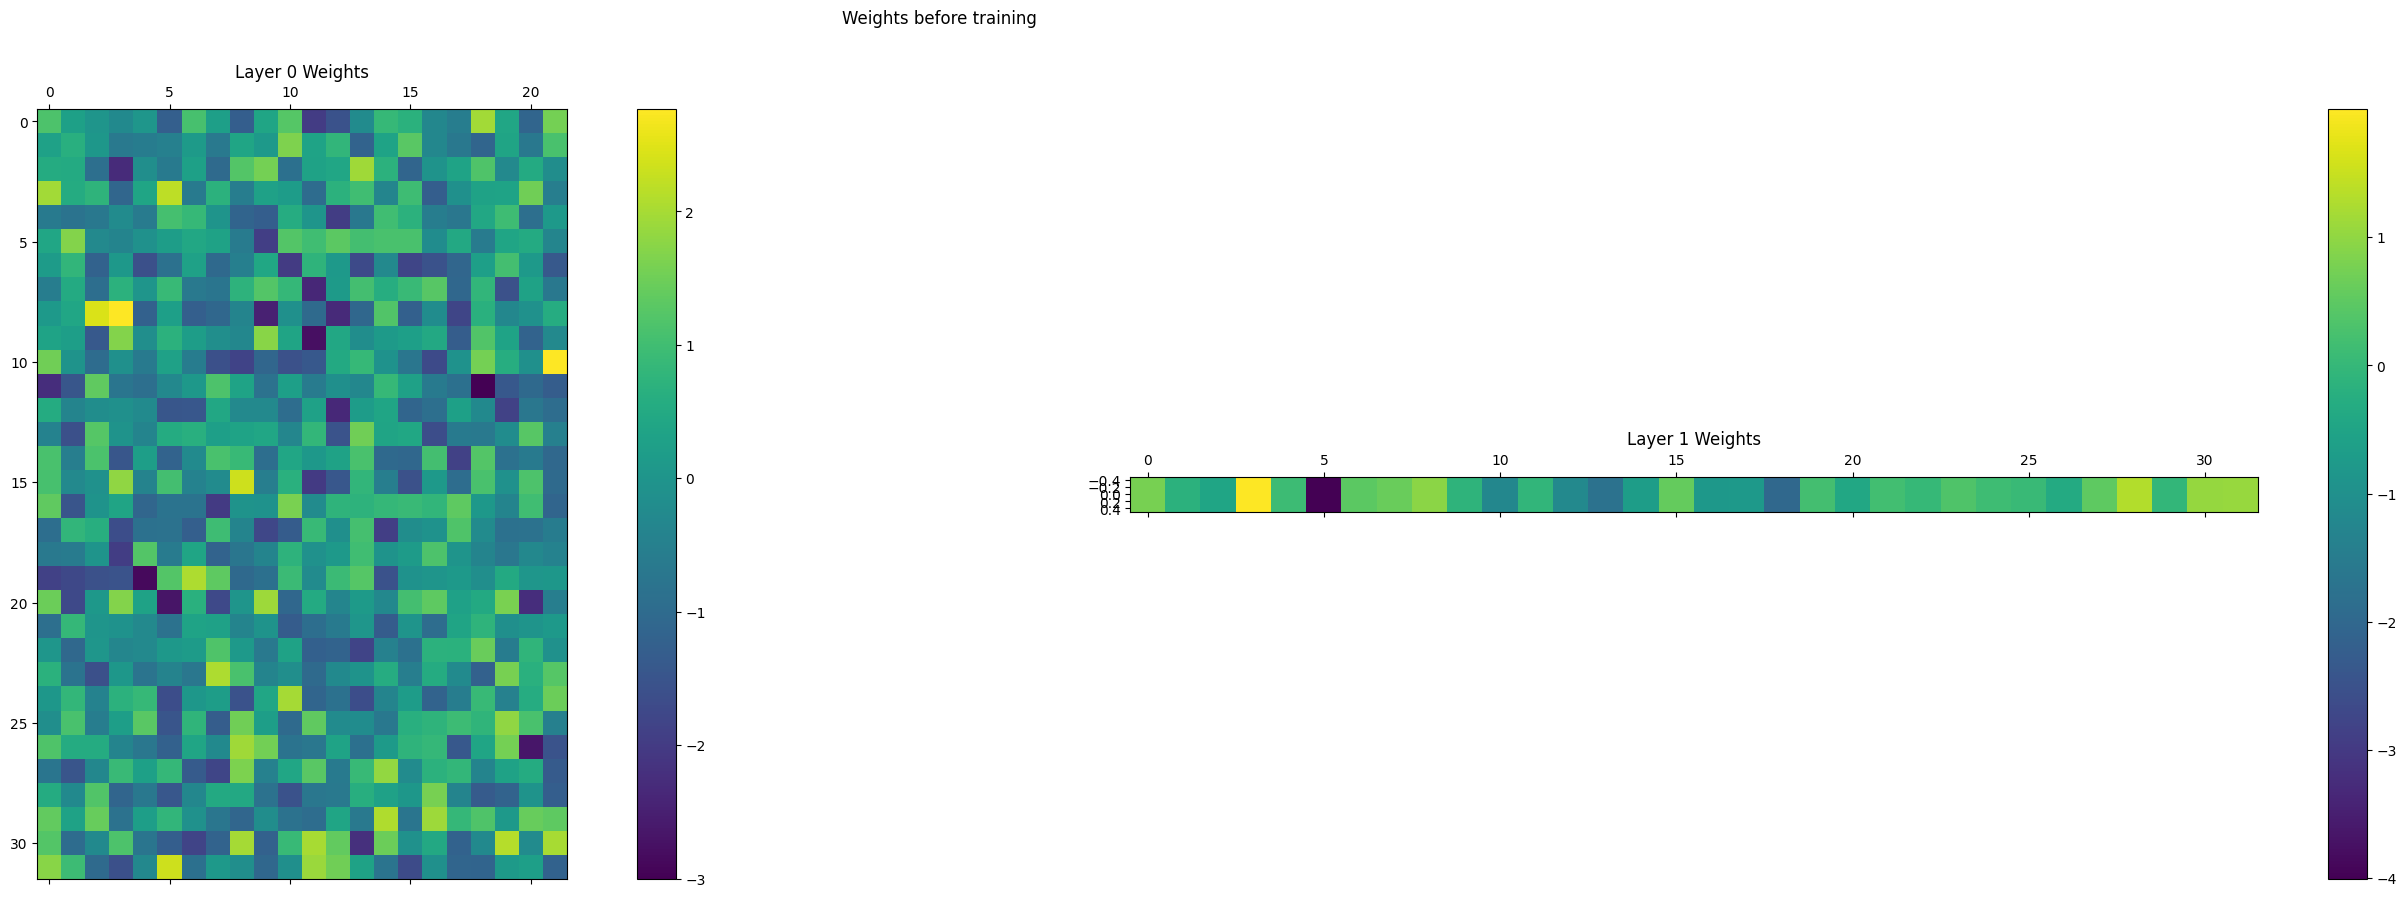

Training Progress:   0%|          | 0/64 [00:00<?, ?it/s]

Epoch 1/64 - {'mse_loss': 0.38220435957369386}
Epoch 2/64 - {'mse_loss': 0.41142811597025025}
Epoch 3/64 - {'mse_loss': 0.41976822985496276}
Epoch 4/64 - {'mse_loss': 0.42076334170121893}
Epoch 5/64 - {'mse_loss': 0.43015276099321936}
Epoch 6/64 - {'mse_loss': 0.4296337561802013}
Epoch 7/64 - {'mse_loss': 0.4309031297045283}
Epoch 8/64 - {'mse_loss': 0.4312381127509998}
Epoch 9/64 - {'mse_loss': 0.42546018179034123}
Epoch 10/64 - {'mse_loss': 0.4290383020727194}
Epoch 11/64 - {'mse_loss': 0.4300010623411636}
Epoch 12/64 - {'mse_loss': 0.42872174096897364}
Epoch 13/64 - {'mse_loss': 0.4103204492483371}
Epoch 14/64 - {'mse_loss': 0.4064752725206076}
Epoch 15/64 - {'mse_loss': 0.41440607050273637}
Epoch 16/64 - {'mse_loss': 0.41787702323625003}
Epoch 17/64 - {'mse_loss': 0.4240075346687069}
Epoch 18/64 - {'mse_loss': 0.4252317595687246}
Epoch 19/64 - {'mse_loss': 0.4230640621338688}
Epoch 20/64 - {'mse_loss': 0.4265426691243452}
Epoch 21/64 - {'mse_loss': 0.4241955602130869}
Epoch 22/64 -

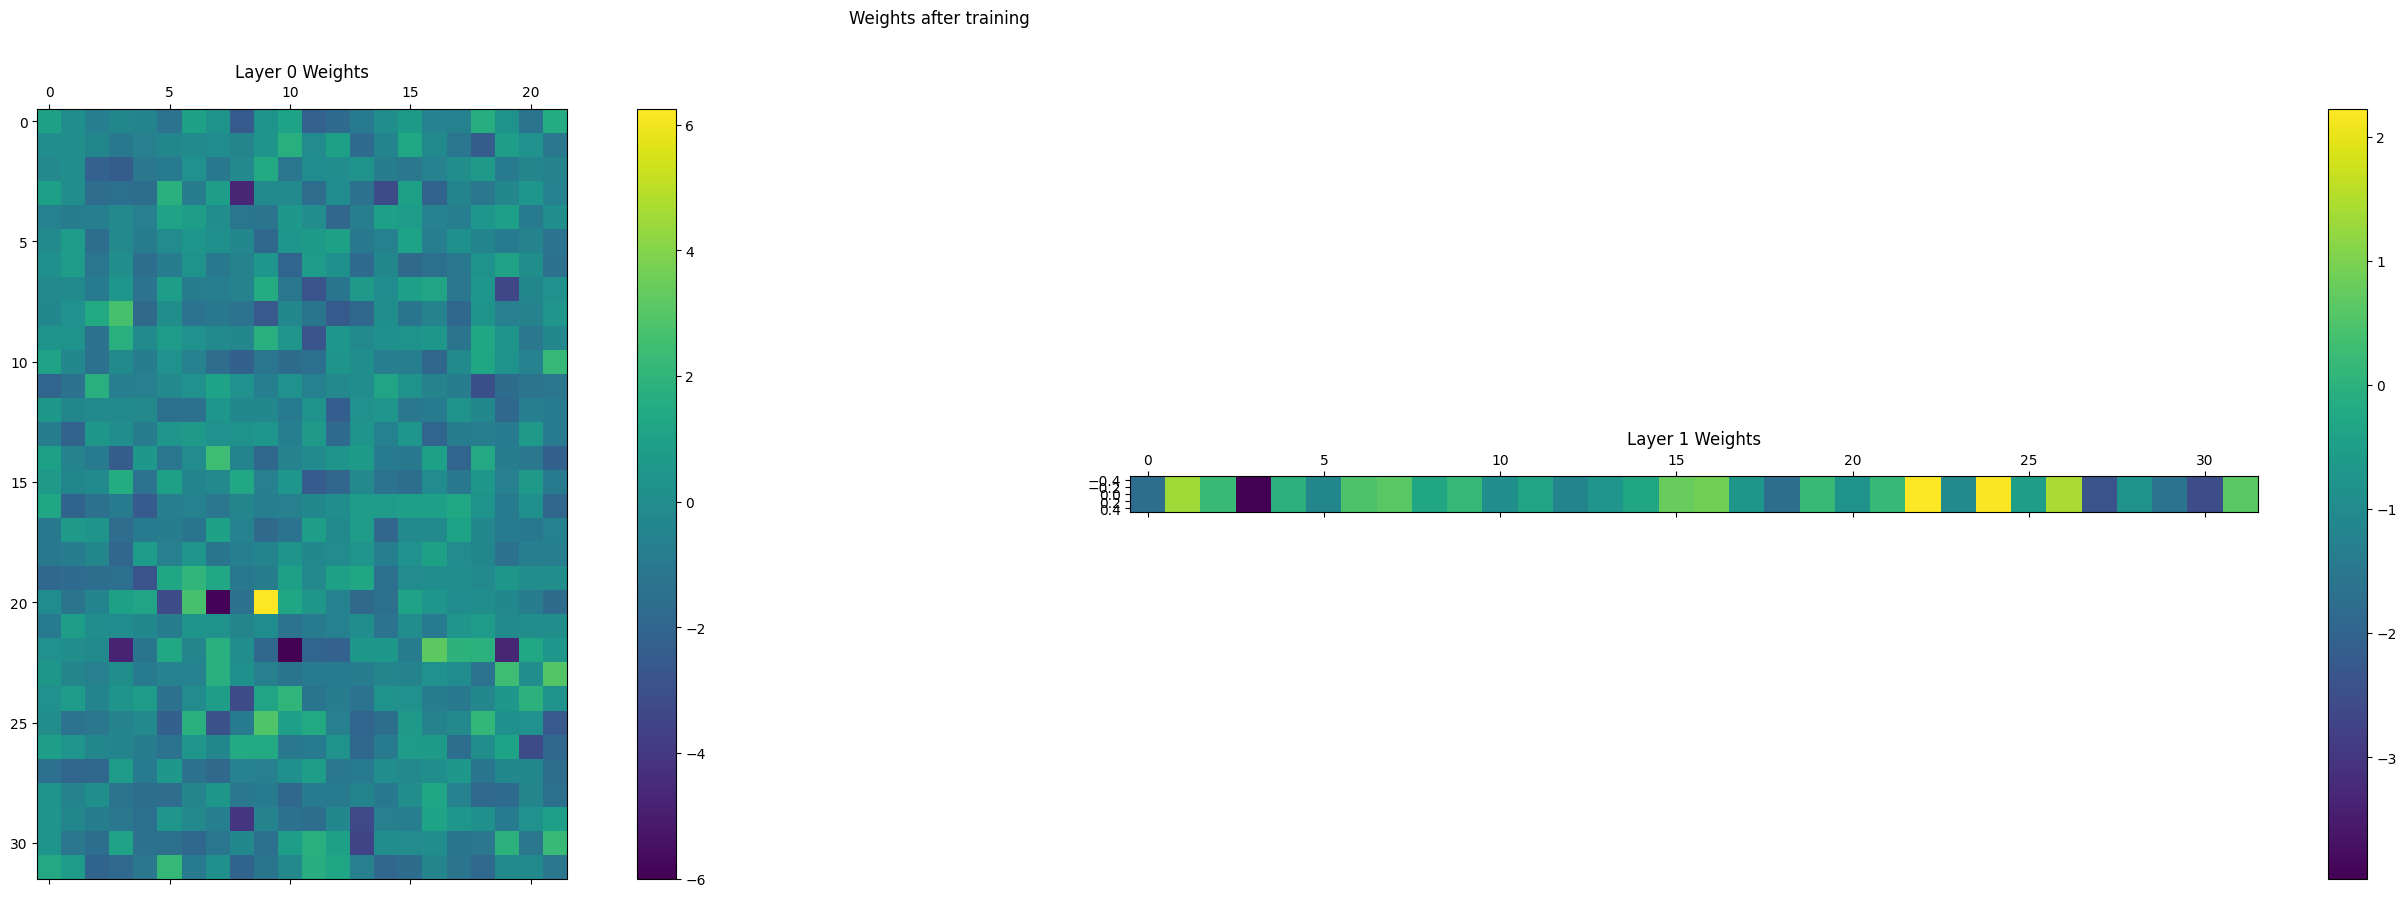

In [26]:
layer_sizes = [mushroom_X_train.shape[1], 32, 1]
activations = [ReLU(), Sigmoid()]

mushroom_network = MLP(layer_sizes, activations, learning_rate=0.1)

visualize_weights(mushroom_network, title="Weights before training")

metrics = mushroom_network.fit(mushroom_X_train, mushroom_y_train, epochs=64, batch_size=12, verbose=True)

visualize_weights(mushroom_network, title="Weights after training")

In [28]:
mushroom_output = mushroom_network.predict(mushroom_X_test.T) 

# convert to binary
mushroom_output = np.where(mushroom_output > 0.5, 1, 0)

print("Accuracy: ", accuracy(mushroom_y_test, mushroom_output.T))
print("Precision: ", precision(mushroom_y_test, mushroom_output.T))
print("Recall: ", recall(mushroom_y_test, mushroom_output.T))
print("F1-Score: ", f1_score(mushroom_y_test, mushroom_output.T))

Accuracy:  0.9495384615384616
Precision:  1.0
Recall:  0.8951406649616368
F1-Score:  0.9446693657219972


## Baseline K-Nearest Neighbors: Regression

In [45]:
knn = KNN(k=20, mode="regression")
knn.fit(wine_X_train, wine_y_train)
wine_output = knn.predict(wine_X_test) 

In [48]:
wine_output = np.round(wine_output).reshape(-1, 1)

print("Accuracy: ", accuracy(wine_y_test, wine_output))
print("MSE: ", mse_loss(wine_y_test, wine_output))

Accuracy:  0.546923076923077
MSE:  0.5907692307692308


## Multi-Layer Perceptron: Reggression

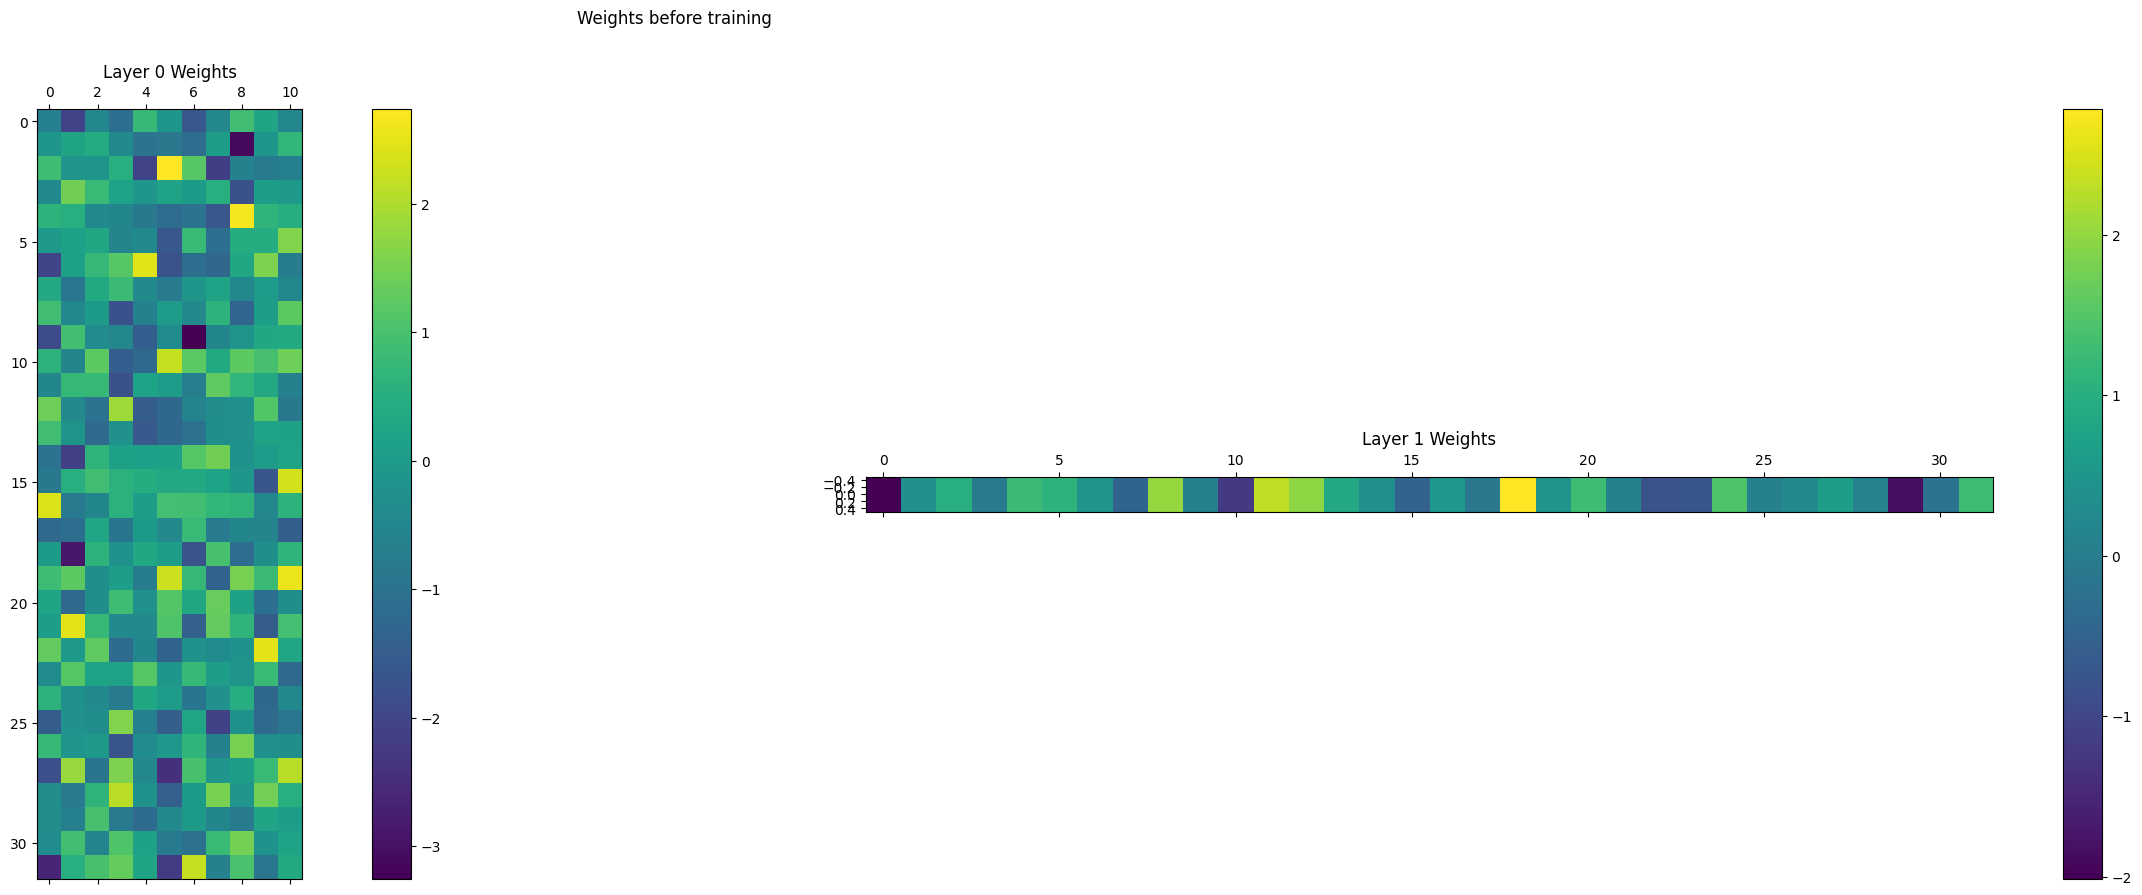

Training Progress:   0%|          | 0/64 [00:00<?, ?it/s]

Epoch 1/64 - {'mse_loss': 24.991797177939286}
Epoch 2/64 - {'mse_loss': 1.7926773940848664}
Epoch 3/64 - {'mse_loss': 1.4681807323239222}
Epoch 4/64 - {'mse_loss': 1.2812194539045672}
Epoch 5/64 - {'mse_loss': 1.2315496180946124}
Epoch 6/64 - {'mse_loss': 1.188313765426369}
Epoch 7/64 - {'mse_loss': 1.1843035914355982}
Epoch 8/64 - {'mse_loss': 1.1558818981529428}
Epoch 9/64 - {'mse_loss': 1.1561448925645732}
Epoch 10/64 - {'mse_loss': 1.1503266924814877}
Epoch 11/64 - {'mse_loss': 1.1309996088993846}
Epoch 12/64 - {'mse_loss': 1.13581082053795}
Epoch 13/64 - {'mse_loss': 1.1152035595633265}
Epoch 14/64 - {'mse_loss': 1.1151553779596}
Epoch 15/64 - {'mse_loss': 1.1212683119926308}
Epoch 16/64 - {'mse_loss': 1.1077483231612635}
Epoch 17/64 - {'mse_loss': 1.0987055399947474}
Epoch 18/64 - {'mse_loss': 1.110655957014683}
Epoch 19/64 - {'mse_loss': 1.1083288501076236}
Epoch 20/64 - {'mse_loss': 1.1060300627528579}
Epoch 21/64 - {'mse_loss': 1.1051433465186373}
Epoch 22/64 - {'mse_loss': 1.

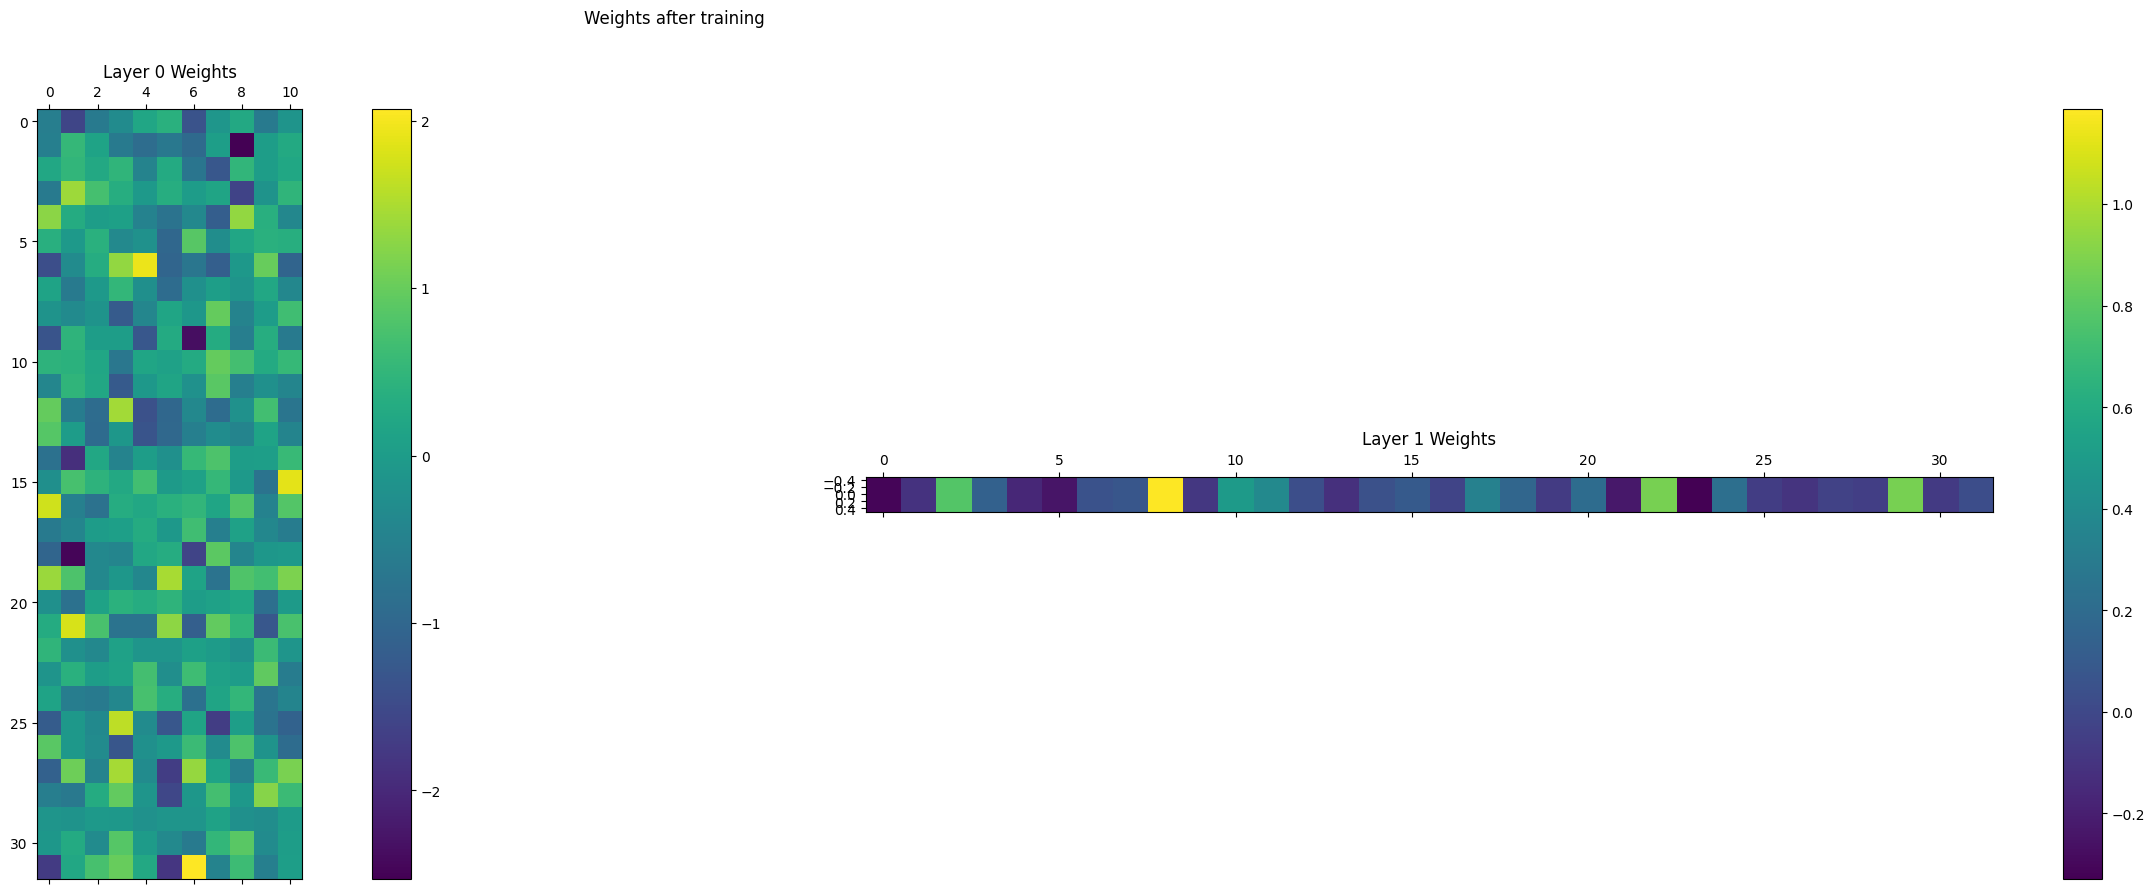

In [53]:
layer_sizes = [wine_X_train.shape[1], 32, 1]
activations = [ReLU(), Linear()]

mlp = MLP(layer_sizes, activations, learning_rate=0.001)

visualize_weights(mlp, title="Weights before training")

metrics = mlp.fit(wine_X_train, wine_y_train, epochs=64, batch_size=32, verbose=True)

visualize_weights(mlp, title="Weights after training")

In [55]:
wine_output = mlp.predict(wine_X_test.T) 
wine_output = np.round(wine_output)

print("Accuracy: ", accuracy(wine_y_test, wine_output.T))
print("MSE: ", mse_loss(wine_y_test, wine_output.T))

[[7. 5. 7. ... 7. 5. 7.]]
Accuracy:  0.5338461538461539
MSE:  0.5992307692307692


## Hyperparameter Tuning

### K-Nearest Neighbors - Classification

In [ ]:
param_grid = {
    'k': [3, 5, 7, 10, 15, 50, 100, 200],
}

fixed_params = {
    'mode': 'classification'
}

### Multi-Layer Perceptron - Classification

In [ ]:
layer_sizes_options = [32, 64, 128, 256]
max_layers = 4  #exploring up to 3 hidden layers

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # List of learning rates to try
    'batch_size': [8, 16, 32, 64],  # List of batch sizes to try
    'epochs': [32, 64, 128],  # List of epochs to try
    'layer_sizes': [[mushroom_X_train.shape[1]] + list(combo) + [1] for num_layers in range(2, max_layers + 1) for combo in product(layer_sizes_options, repeat=num_layers)]
}